In [1]:
!pip install tensorflow --user

  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp37-cp37m-win_amd64.whl (1.5 MB)
  Using cached protobuf-3.19.6-cp37-cp37m-win_amd64.whl (896 kB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached wrapt-1.15.0-cp37-cp37m-win_amd64.whl (35 kB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached Werkzeug-2.2.3-py3-none-any.whl (233 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached urllib3-1.26.15-py2.py3-none-any.whl (140 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
# Imports
from network import Network
from tensorflow.keras.datasets import fashion_mnist  # noqa
import numpy as np

In [3]:
# Parameters
labels = ["t-shirt", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "boot"]
network_seed = 12
hidden_layer_shape = [18]
train_val_split = 0.2
alpha = 0.0001

# Load and shape data
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

# Shuffle the training data
np.random.seed(network_seed)
perm = np.random.permutation(len(X_train))
X_train = X_train[perm]
Y_train = Y_train[perm]

# Validation Split
split_index = int(len(X_train) * 0.2)
X_train = X_train[split_index:]
Y_train = Y_train[split_index:]
X_val = X_train[:split_index]
Y_val = Y_train[:split_index]

In [4]:
print("Train Data:", X_train.shape, Y_train.shape)
print("Validation Data:", X_val.shape, Y_val.shape)
print("Test Data:", X_test.shape, Y_test.shape)

Train Data: (48000, 784) (48000,)
Validation Data: (12000, 784) (12000,)
Test Data: (10000, 784) (10000,)


100%|██████████| 300/300 [elapsed: 00:58 remaining: 00:00] , Alpha: 0.0001, Validation Acc: 0.70208333


Final Training Accuracy: 70.44%
Final Validation Accuracy: 70.21%
Final Recall Per-Class: 77.05%
Final Precision Per-Class: 76.56%
Final F1 Score Per-Class: 76.72%

=============== Highest Confusion Rate per Gesture ===============
't-shirt' mostly confused by 'shirt' in 7.68% of cases
'trouser' mostly confused by 'dress' in 3.54% of cases
'pullover' mostly confused by 'coat' in 17.95% of cases
'dress' mostly confused by 't-shirt' in 4.28% of cases
'coat' mostly confused by 'pullover' in 12.18% of cases
'sandal' mostly confused by 'sneaker' in 11.27% of cases
'shirt' mostly confused by 't-shirt' in 17.64% of cases
'sneaker' mostly confused by 'sandal' in 8.72% of cases
'bag' mostly confused by 'sandal' in 3.74% of cases
'boot' mostly confused by 'sneaker' in 5.6% of cases



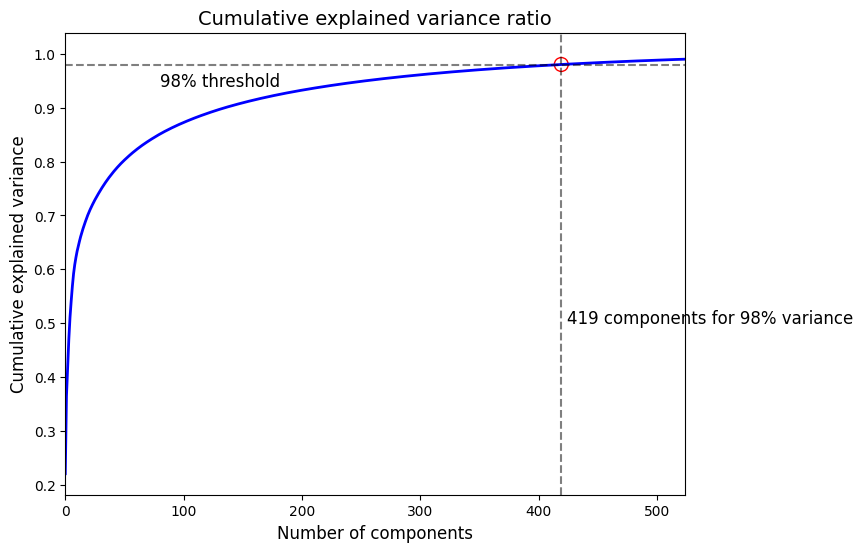

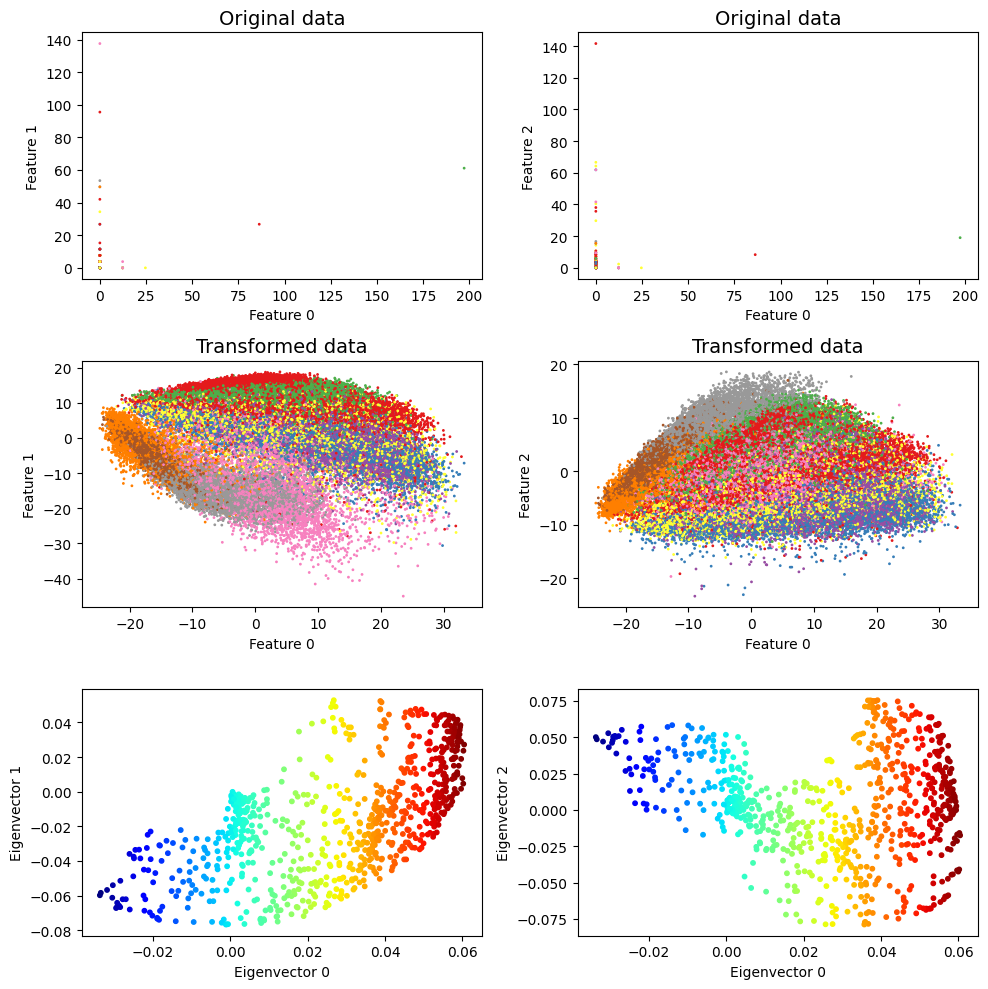

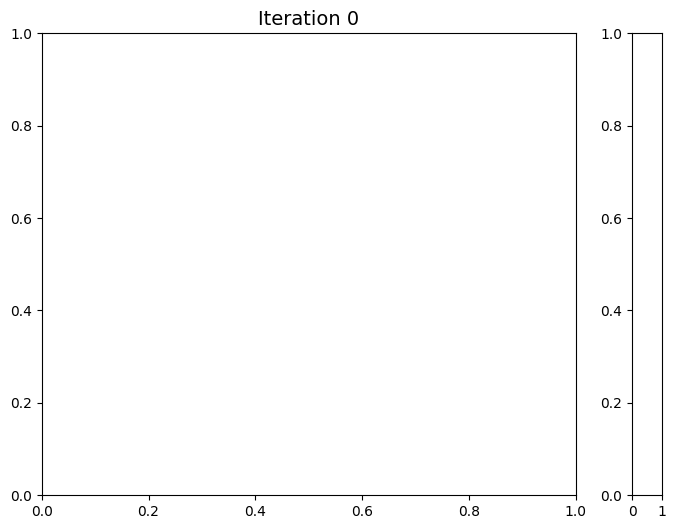

C:\Users\Marce\AppData\Roaming\Python\Python37\site-packages\matplotlib\animation.py:888: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  'Animation was deleted without rendering anything. This is '


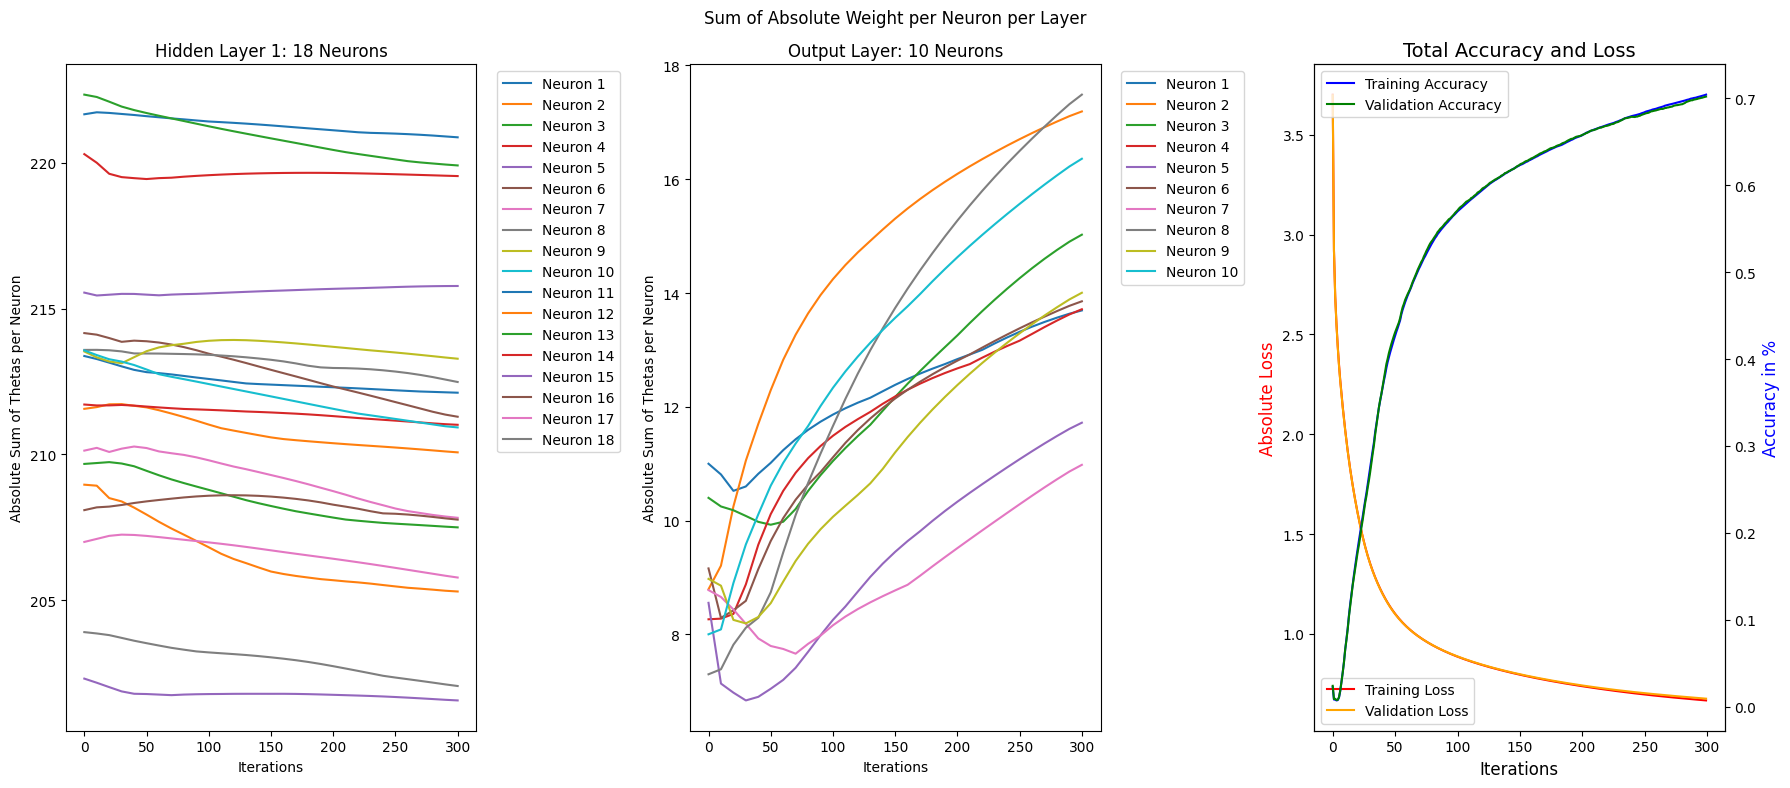

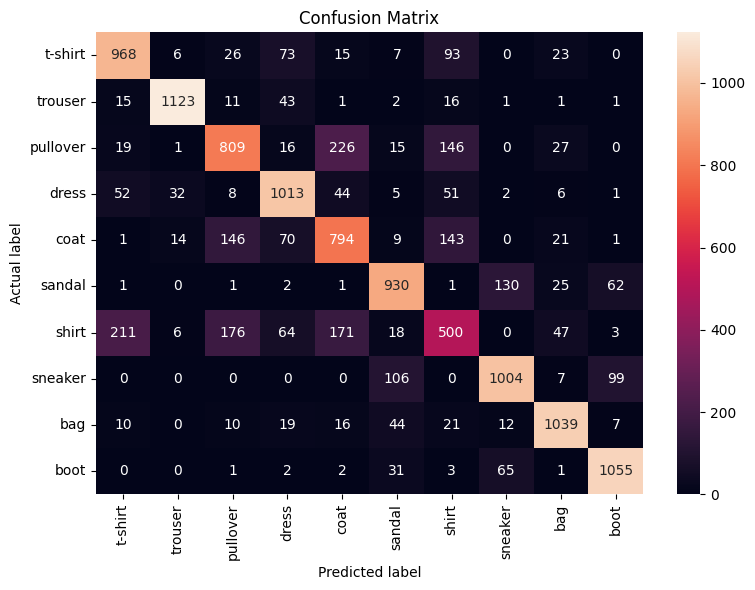

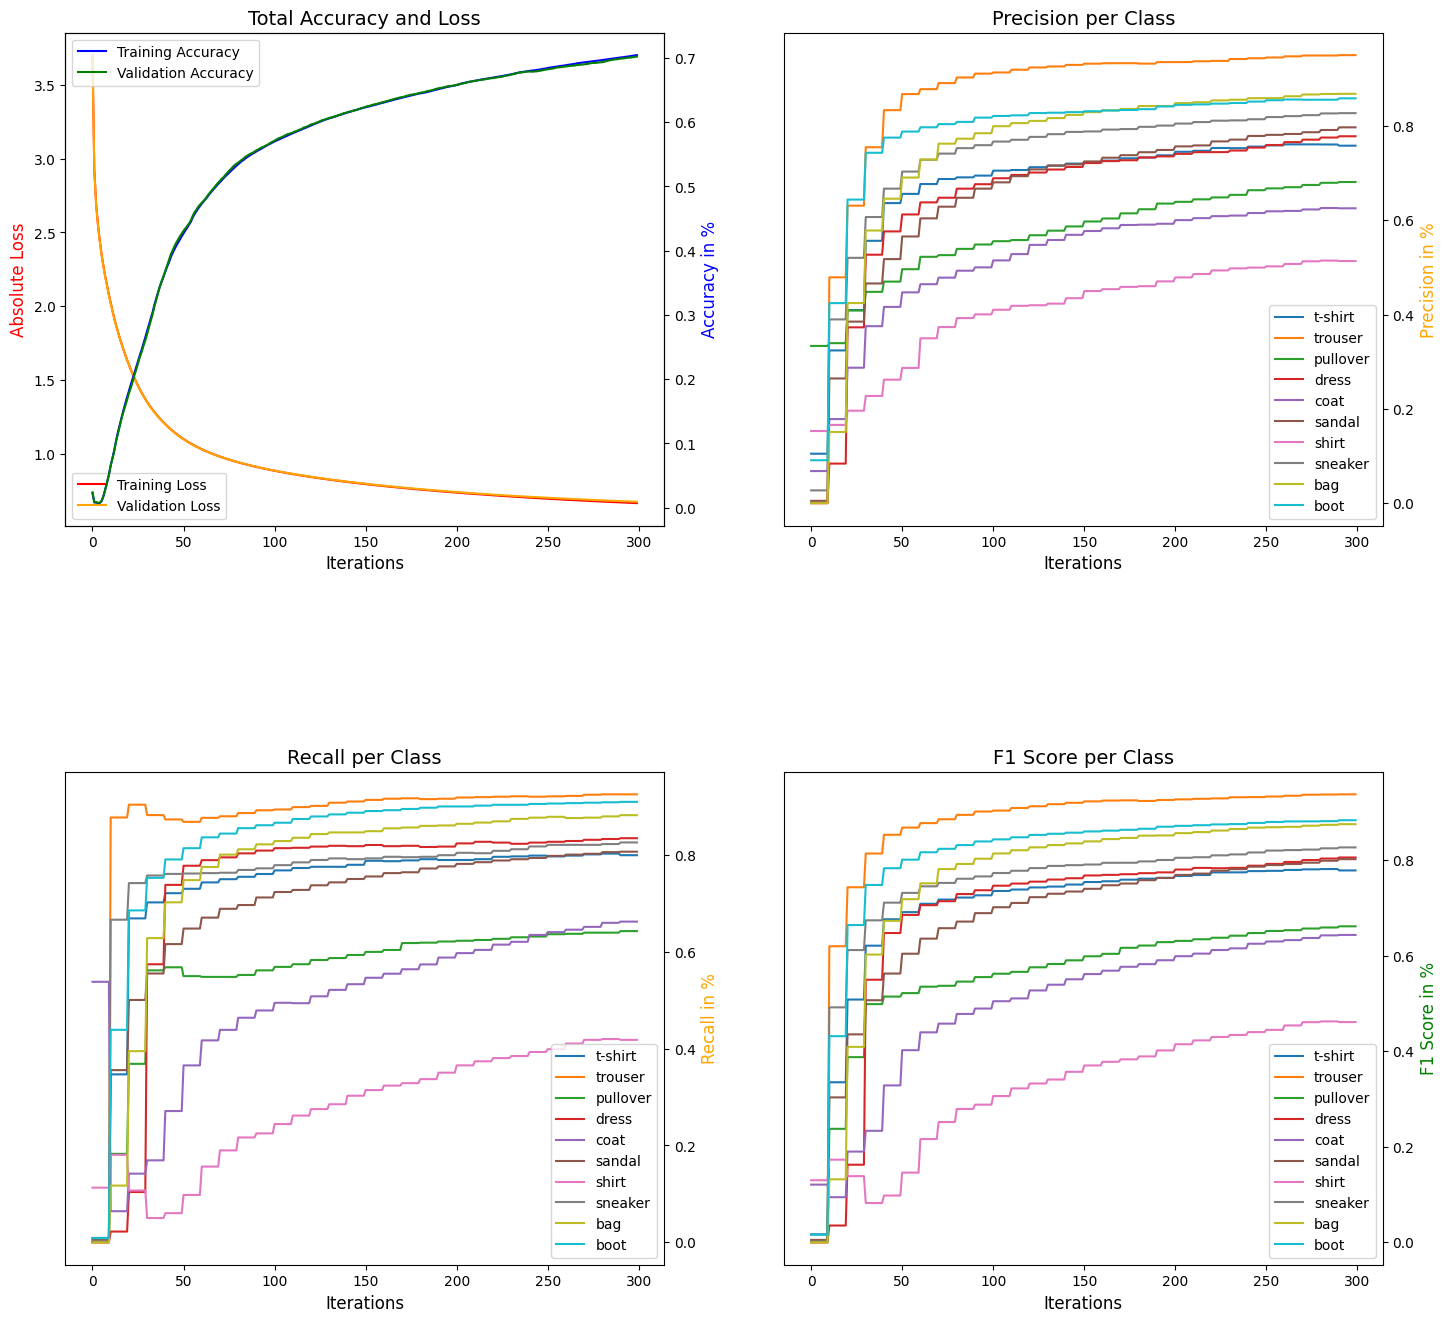

Saved to ./hyper_params_2023-04-09_22-53-14.npz


C:\Users\Marce\AppData\Roaming\Python\Python37\site-packages\numpy\lib\npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


In [5]:
layer_shape = [X_train.shape[1]]
for layer in hidden_layer_shape:
    layer_shape.append(layer)
layer_shape.append(len(labels))

# Create
network = Network(layer_shape=layer_shape, seed=network_seed)

# Train the network with hyper parameters
# DISCLAIMER: The confusion matrix 2D live plot does not work within a jupyter notebook.
network.train(hidden_layer_shape=hidden_layer_shape,
              iterations=300,
              alpha=alpha,
              X_train=X_train,
              y_train=Y_train,
              X_val=X_val,
              y_val=Y_val,
              show_plots=True,
              use_feature_scaling=True,
              class_labels=labels,
              pca_threshold=0.98)

network.save(".")

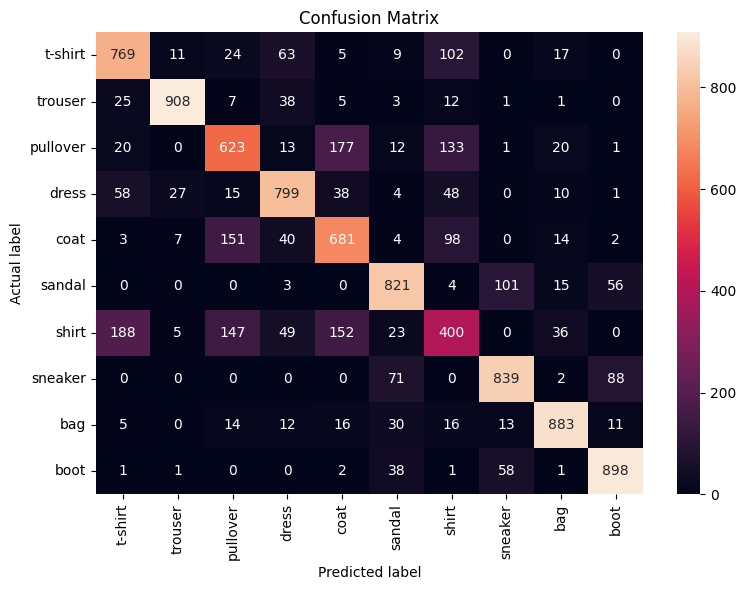

In [6]:
# ====== Evaluate the network ======
# Predict
Y_test_pred = network.predict(X=X_test, apply_feature_scaling=True)
# Evaluate
eval_data = network.evaluate(y_pred=Y_test_pred, ground_truth=Y_test)